In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dummies_data.csv')

In [3]:
df.head(5)

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_periods_1-12,Tenure_periods_13-24,Tenure_periods_25-36,Tenure_periods_37-48,Tenure_periods_49-60,Tenure_periods_61-72
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [22]:
X = df.drop('Churn', axis = 1)
y = df['Churn'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=42)

Models: <br>
1. Naive Bayes <br>

In [24]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [25]:
gnb.score(X_test,y_test)

0.6958066808813077

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1033
           1       0.46      0.83      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.79      0.70      0.71      1407



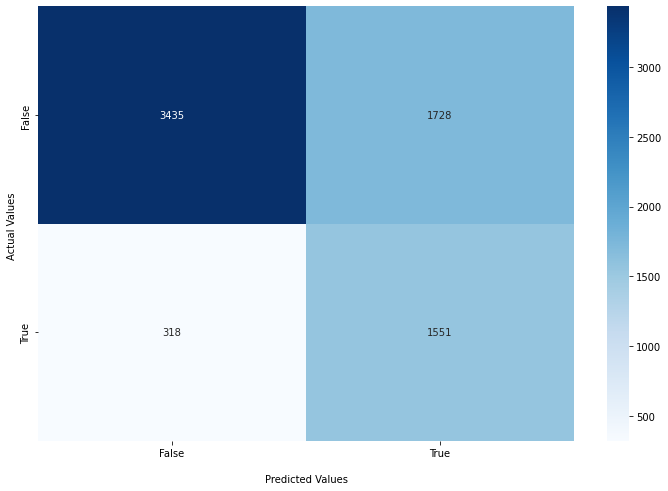

In [44]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(cm, annot=True,fmt="d", cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

2. Logistic regression <br>

3. K-nearest neighbors <br>
4. Random forest <br>
5. Xgboost